<a href="https://colab.research.google.com/github/rohitrv8922/Netflix-Tv-shows-and-movies/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

Importing Libraries

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading the Dataset
There is a total of 7787 movies / TV shows in this data set collected from AlmaBetter

Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df='/content/drive/My Drive/'
netflix_df=pd.read_csv(df +'netflix_movies_tv.csv',encoding='latin-1')

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#Exploratory Data Analysis (EDA)

In [6]:
netflix_df.shape

(7787, 12)

In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#NULL VALUES

In [10]:
netflix_df.isnull().sum()/netflix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [11]:
netflix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [12]:
netflix_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

**NULL VALUE TREATMENT**

1.RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

2.CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3.DATE - there are few missing values for date column. so, lets drop missing value rows.

4.DIRECTOR - Director column has more then 30% null values so dropping that column

In [13]:
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_df['cast'].replace(np.nan, 'missing info',inplace  = True)

netflix_df= netflix_df.drop(columns='director',axis=1)

In [14]:
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]

In [16]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
# add new features
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

#Analyze the type of content available on Netflix

Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

**Netflix Content By Type**

In [18]:
# ploting for pie chart on type feature
# import plotly.express as px
x = netflix_df['type'].value_counts().reset_index()
colors=['DodgerBlue','PaleTurquoise']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)))

Observations :-

It is evident that there are more movies on Netflix than TV shows.
Netflix has 5377 movies, which is more than double the quantity of TV shows.
There are about 70% movies and 30% TV shows on Netflix.

In [19]:
country = netflix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

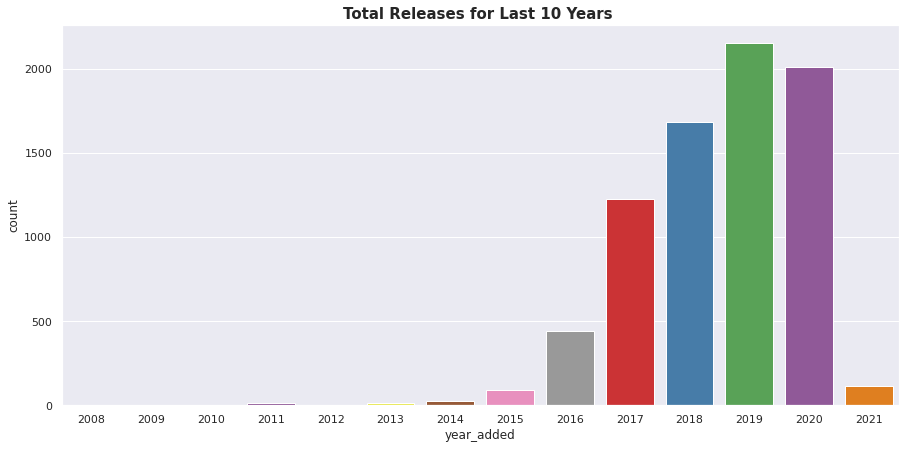

In [20]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=netflix_df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19**

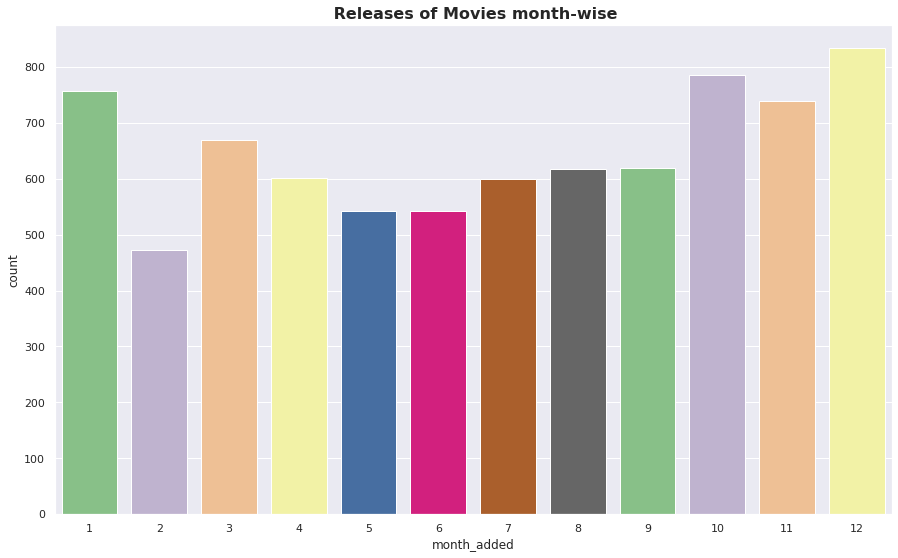

In [21]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=netflix_df,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

**More of the content is released in holiday season - October, November, December and January**

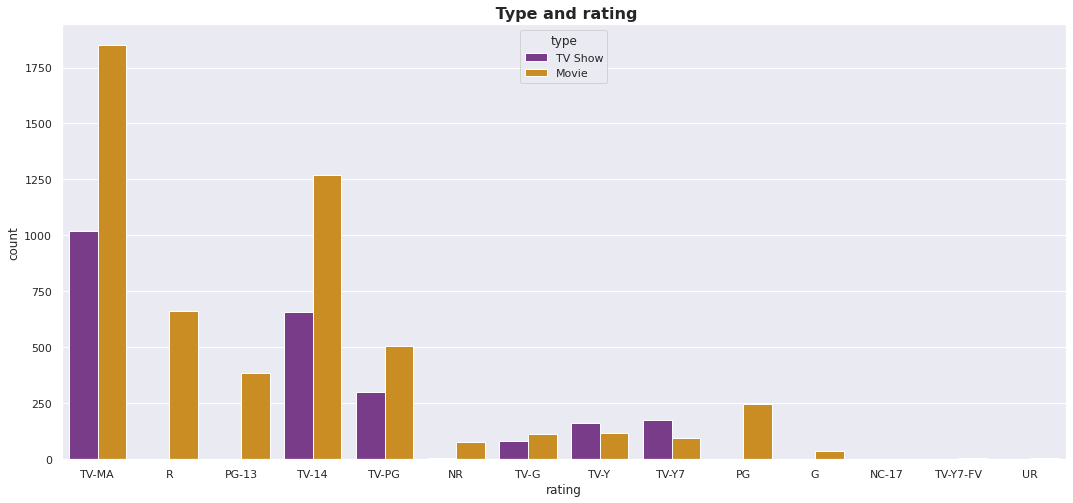

In [22]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=netflix_df,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

Top Genres on Netflix

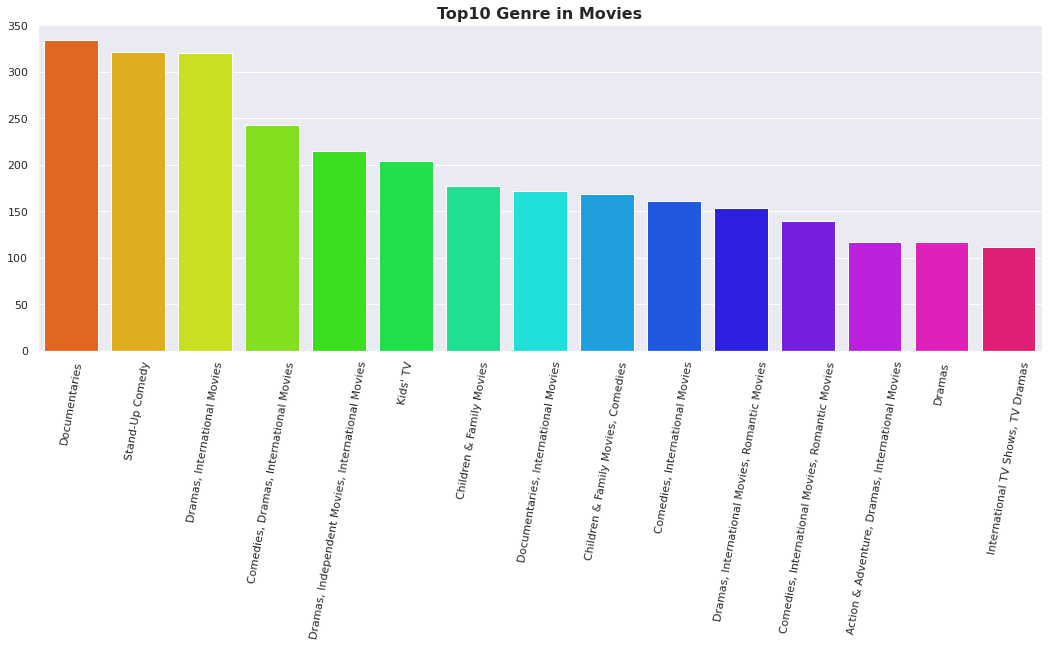

In [23]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..

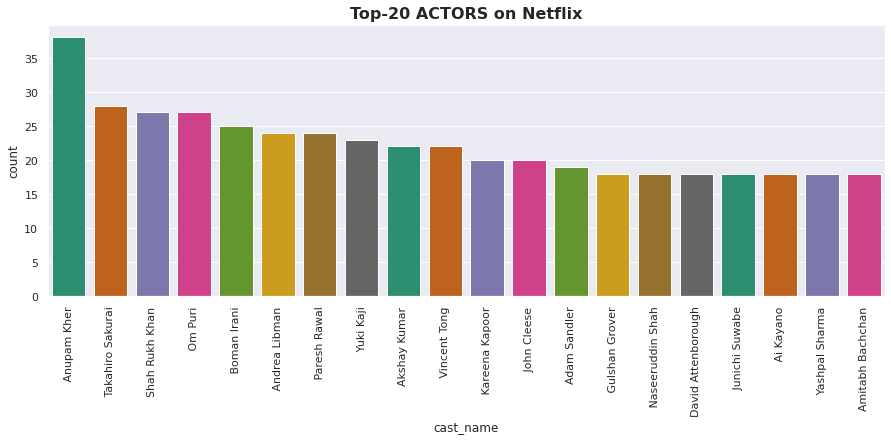

In [24]:
# Top 20 actors netflix
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

In [25]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   int64         
 13  cast_name     7777 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.1+ MB


In [26]:
netflix_df['duration']=netflix_df['duration'].str.replace('Season','')
netflix_df['duration']=netflix_df['duration'].str.replace('s','')
netflix_df['duration']=netflix_df['duration'].str.replace('min','')

netflix_df['duration']=netflix_df['duration'].astype(str).astype(int)
netflix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

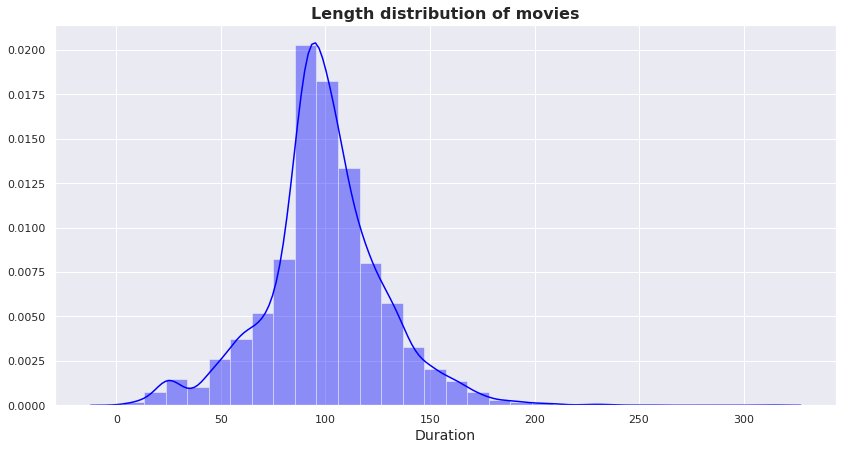

In [27]:
# Length distribution of movies
movie_df = netflix_df[netflix_df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [28]:
# Season-wise distribution of tv shows
tv_df = netflix_df[netflix_df['type']=='TV Show']
tv_df['duration'].value_counts()

tv=tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'RebeccaPurple', width=2)))

#LONGEST TV - SHOWS

In [29]:
long_shows = tv_df[tv_df['duration']>9]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


#DATA CLEANING AND PREPROCESSING

In [30]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [31]:
movie_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1,inplace=True)

tv_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

new_netflix_df = netflix_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1)
# movie_df
new_netflix_df

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9
7785,TV Show,Australia,2019,TV-PG,1,"International TV Shows, Reality TV",2020,10


In [32]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_netflix_df["type"] = le.fit_transform(new_netflix_df["type"])
new_netflix_df["country"] = le.fit_transform(new_netflix_df["country"])

new_netflix_df['rating'] = le.fit_transform(new_netflix_df['rating'])
new_netflix_df['listed_in'] = le.fit_transform(new_netflix_df['listed_in'])

Text Cleaning

In [33]:
#combining genre and description column 
text_df = netflix_df['listed_in'] + netflix_df['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7777, dtype: object

In [34]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [35]:
new_text_df = text_df.apply(clean_text)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7777, dtype: object

EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range.

In [36]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_df)
print(vect.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'always', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'audience', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'bear', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brings', 'british', 'brother', 

In [37]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['international'])
print(dd['bear'])

international bear
1.7552031425318138
6.963322241161702


In [38]:
new_text_df.head()

0    International Shows Dramas Sci-Fi FantasyIn fu...
1    Dramas International MoviesAfter devastating e...
2    Horror Movies International MoviesWhen army re...
3    Action Adventure Independent Movies Sci-Fi Fan...
4    DramasA brilliant group student become card-co...
dtype: object

Topic Modeling
1. LSA(Latent semantic analysis)

Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text

In [39]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.20329436  0.06175937  0.09592721 -0.0854877  -0.06458157 -0.02401554
 -0.07376066 -0.03773889  0.12408557  0.05234573]
(7777, 10)


In [40]:
l=lsa_top[0]
print("NETFLIX TOPIC 0 :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC 0 :
NETFLIX Topic  0  :  20.329435774027335
NETFLIX Topic  1  :  6.175936889013803
NETFLIX Topic  2  :  9.59272079637808
NETFLIX Topic  3  :  -8.548770173880435
NETFLIX Topic  4  :  -6.458157358579053
NETFLIX Topic  5  :  -2.4015543290341927
NETFLIX Topic  6  :  -7.376065657406508
NETFLIX Topic  7  :  -3.7738887852403633
NETFLIX Topic  8  :  12.408557489426872
NETFLIX Topic  9  :  5.234572886665286


Similalry for other documents we can do this. However note that values don't add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [41]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 6.54814043e-03  5.45359609e-03  7.73171456e-03 ...  1.31172716e-01
   8.71081208e-03  5.78147844e-03]
 [ 4.59670098e-03 -3.87975478e-03  1.73205845e-04 ... -6.02011218e-02
  -5.12968415e-03  1.00641189e-03]
 [ 3.53892789e-03  2.78710779e-04  1.23952578e-03 ... -3.98718536e-02
  -2.22771222e-03  5.97212948e-04]
 ...
 [ 3.43268170e-03  4.35922128e-03 -3.18393501e-03 ...  1.61563263e-02
  -3.48354660e-03  3.83427919e-03]
 [ 8.00347041e-03 -3.27479266e-03 -7.77907820e-03 ... -3.97068238e-03
  -1.03266662e-03 -3.45722614e-03]
 [ 7.83490442e-03 -3.84554370e-03  1.35877130e-03 ...  2.21119859e-01
   3.97235190e-04 -4.27220658e-03]]


#TOP-10 TOPICS ON NETFLIX

In [42]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand family children world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk family take show life 

 NETFLIX Genre 4: 
family children movies shows save friend comedieswhen christmas music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best high series 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime reality 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa world 

 NETFLIX Genre 9: 
life docuseries woman young nature reality science love family romantic 



1.We can see that the topic modelling did the genre analysis in movies and tv shows.
2.Each topic identifies genre of movies an tv shows on netflix.

Latent Dirichlet Allocation (LDA)

latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.

In [43]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top[0])

(7777, 10)
[0.02414781 0.02414303 0.02414136 0.02415397 0.12214092 0.02414674
 0.58175751 0.02414322 0.1270754  0.02415005]


In [44]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc 0 for eg
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

1.0000000000000002
Doc 0: 
Topic  0 :  2.4147809143283903 %
Topic  1 :  2.4143029711551263 %
Topic  2 :  2.4141358241610336 %
Topic  3 :  2.4153969733360574 %
Topic  4 :  12.214092335430287 %
Topic  5 :  2.4146737654243973 %
Topic  6 :  58.17575071879052 %
Topic  7 :  2.4143217335566787 %
Topic  8 :  12.707539707286763 %
Topic  9 :  2.4150050565307697 %


In [45]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[1.04432091e-01 1.03642804e-01 1.04904220e-01 1.26791879e-01
 2.35666352e-01 1.03858165e-01 1.36446445e+01 1.04937836e-01
 1.24334963e+01 1.30967702e+01 1.03439711e-01 3.33425167e+01
 1.54856499e+01 1.04411396e-01 1.03465536e-01 1.11435993e-01
 2.74705951e+01 1.33638847e+01 2.12452252e-01 1.07239401e-01
 1.78728907e+00 1.27625938e-01 7.83609470e+00 1.09042018e-01
 1.05177916e-01 1.58972297e-01 1.04129241e-01 1.11609326e-01
 1.03677225e-01 1.05655616e-01 4.26744204e+00 1.05327382e-01
 1.05649607e-01 1.04411600e-01 1.05294716e-01 1.07118538e-01
 1.59497001e-01 1.69475412e-01 7.70660034e+00 1.47349619e+01
 1.05476471e-01 1.04203495e-01 5.06161192e+00 1.15596463e-01
 1.04295817e-01 1.28228483e-01 1.04905048e-01 1.56133994e+01
 1.03553632e-01 6.57137882e+00 1.06905767e-01 1.06424457e-01
 1.04088899e-01 1.53304650e+01 1.89427494e+01 1.04047532e-01
 7.32589991e+00 7.49685916e+00 1.05003983e-01 9.53543676e+00
 5.50436156e+01 1.04125591e-01 1.25492799e-01 2.97663263e+01
 5.78695534e+00 1.035931

most important features for each topic

In [46]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
international dramas shows movies comedies 

Topic 1: 
family sports town children small 

Topic 2: 
hero learning gangster martial growing 

Topic 3: 
movies international dramas romantic comedies 

Topic 4: 
island order middle comediesafter dream 

Topic 5: 
moviesan movies horror international dramas 

Topic 6: 
fi sci kids adventure action 

Topic 7: 
stand documentary documentaries comedy special 

Topic 8: 
action adventure international crew old 

Topic 9: 
shows crime international spanish language 



#GENRE WORDCLOUD

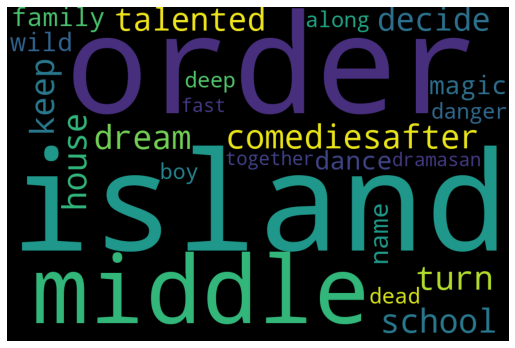

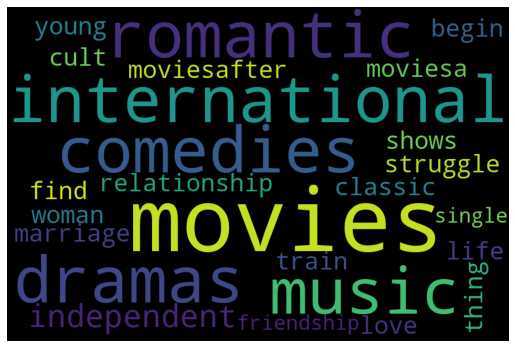

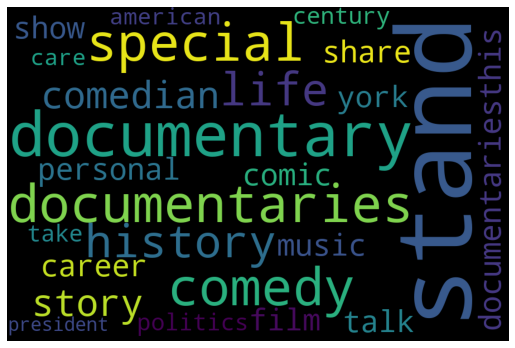

In [47]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.subplots(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
# topic 0

draw_word_cloud(4)
draw_word_cloud(3)
draw_word_cloud(7)

As we can see from the wordcloud that from two topics one is about documentries and other is about kids shows, therefore, topic modelling successfully classifies movies and shows into genre.

#Word Cloud for Countries with the most content available

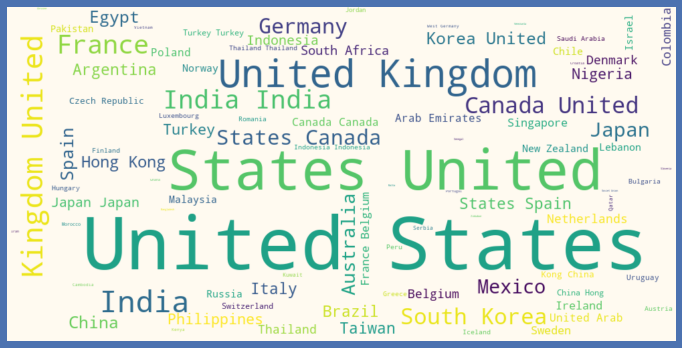

In [48]:
fig = plt.figure(figsize=(10,5),facecolor = 'b',edgecolor = 'r')
wordcloud = WordCloud(background_color='floralwhite',width=1000, height=500 ).generate(" ".join(netflix_df.country))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('country.png')
plt.show()

#Word Cloud for Cast

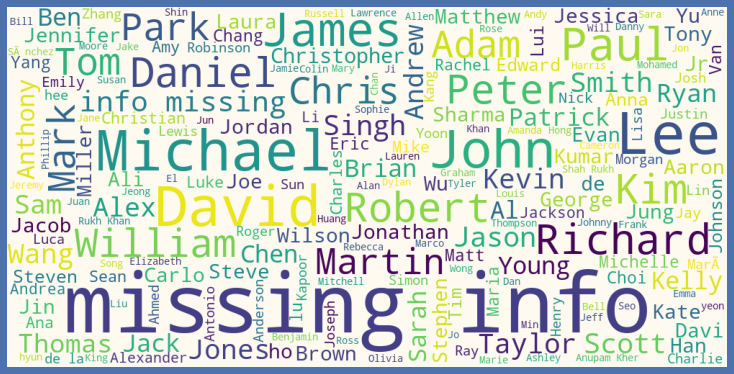

In [49]:
text = netflix_df['cast']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(netflix_df.cast))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#Netflix Content for different age groups in top 10 countries

In [50]:
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [51]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

#CorrelationHeatmap

In [52]:
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

netflix_df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
netflix_df_heatmap = pd.crosstab(netflix_df_heatmap['principal_country'], netflix_df_heatmap['age_rating'],normalize = "index").T
netflix_df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


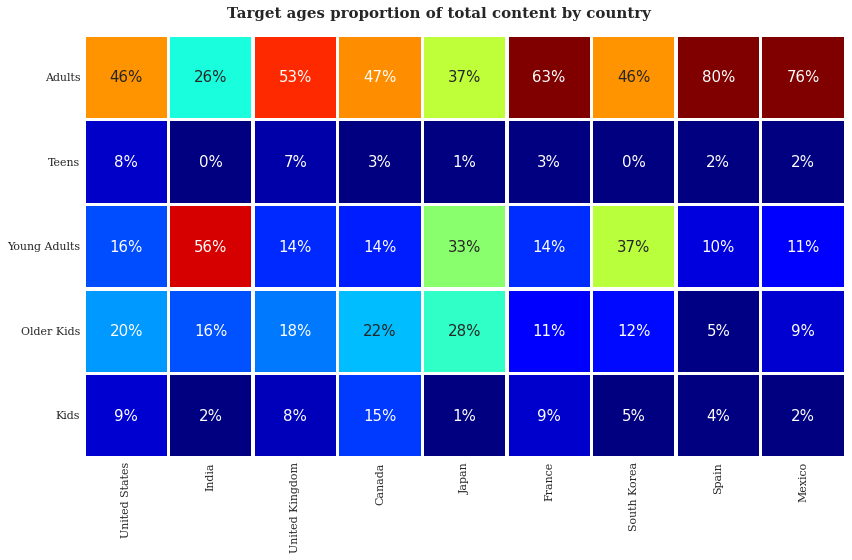

In [53]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(netflix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Observations:

1.It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

2.Also, Mexico and Spain have similar content on Netflix for different age groups.

#Clustering

**Scaling the data**

In [54]:
# transform the data using StandardScaler
netflix_df_standarized = pd.DataFrame(StandardScaler().fit_transform(new_netflix_df),columns = new_netflix_df.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
netflix_df_pca=pd.DataFrame(pca.fit_transform(netflix_df_standarized))


In [55]:
netflix_df_standarized.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496802,-2.041651,0.692231,0.492155,-1.280313,1.084506,1.085420,0.338631
1,-0.668091,-0.505346,0.235617,0.492155,0.467228,0.381066,-1.796311,1.452410
2,-0.668091,-0.099853,-0.335151,-1.052434,0.172698,0.588901,-0.355446,1.452410
3,-0.668091,0.871046,-0.563458,-1.567297,0.211969,-1.713266,-1.075878,1.173965
4,-0.668091,0.871046,-0.677611,-1.567297,1.056286,0.253168,1.085420,-1.610483


#Clusters Model Implementation

**1.Affinity Propagation**

**2.Agglomerative Clustering**

**3.K-means Clustering**

#1. Affinity Propagation

In [56]:
af = AffinityPropagation(preference = -753, damping = 0.60, verbose = True, random_state = 0).fit(netflix_df_standarized) #Using euclidean distance as affinity estimator
#af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) #Using euclidean distance
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(netflix_df_standarized, labels, metric = 'sqeuclidean'))

Converged after 81 iterations.
Estimated number of clusters: 13
Silhouette Coefficient: 0.244


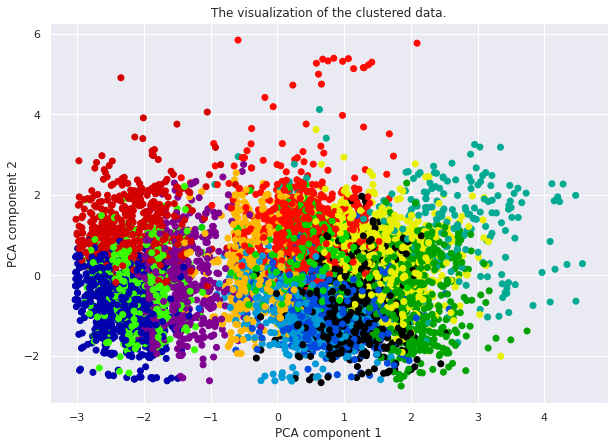

In [57]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
#ax = plt.gca()
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims) 
plt.scatter(netflix_df_pca[0], netflix_df_pca[1], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2');

In [58]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(netflix_df_standarized, labels, metric='sqeuclidean'))

Silhouette Coefficient: 0.244


Silhouette Coefficient score is 0.244 which is not that well. so we will try some diffrent clustering models.

#2. Agglomerative Clustering

In [59]:
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Assume we cut vertical lines with a horizontal line to obtain the number of clusters.
Number of clusters = 4

For n_clusters = 4 The average silhouette_score is : 0.17296314851287742


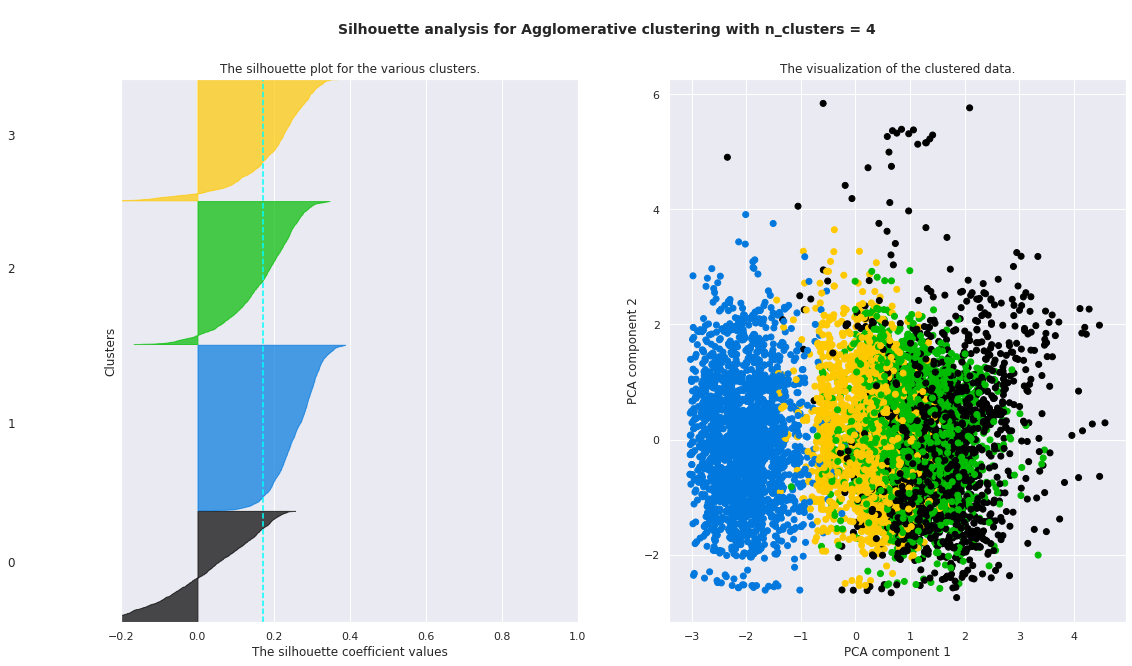

In [60]:
silhouette_analysis(np.array(netflix_df_standarized),netflix_df_pca,[4])

#3. K-MEANS clustering

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


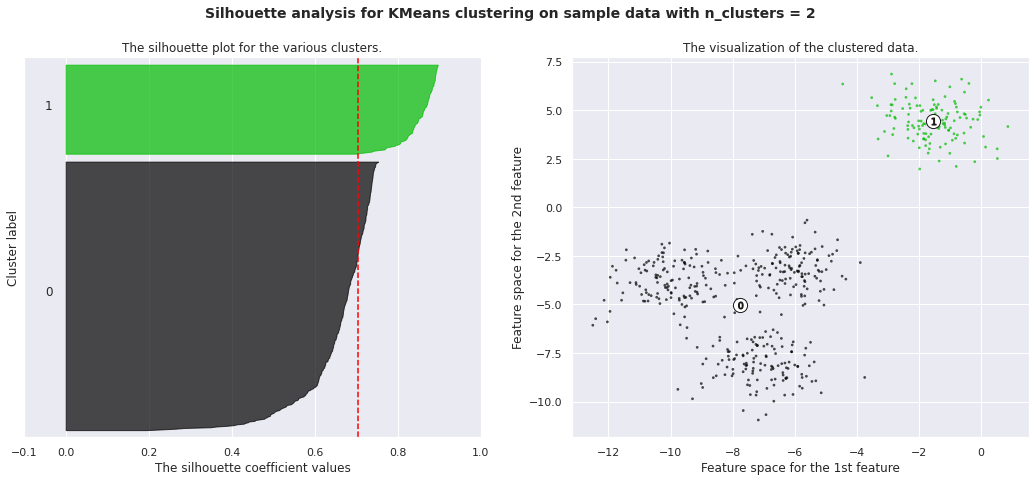

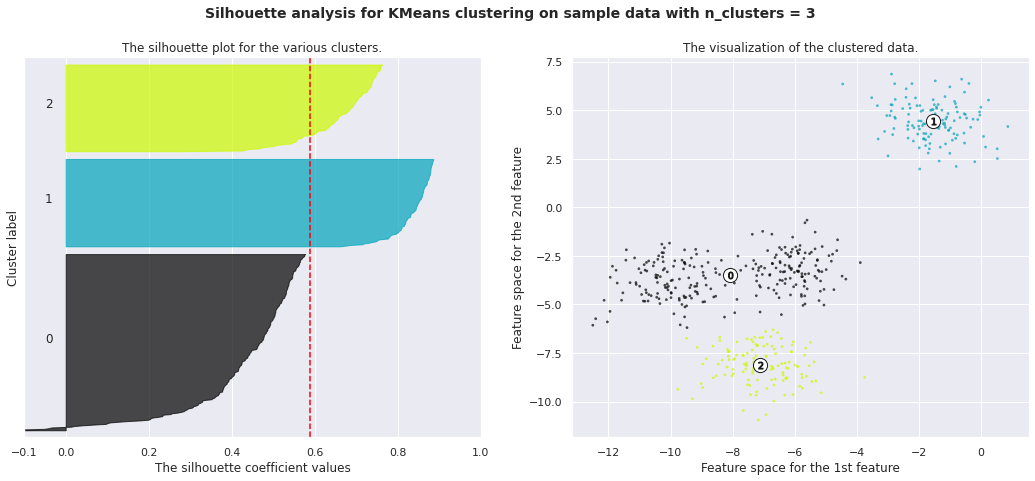

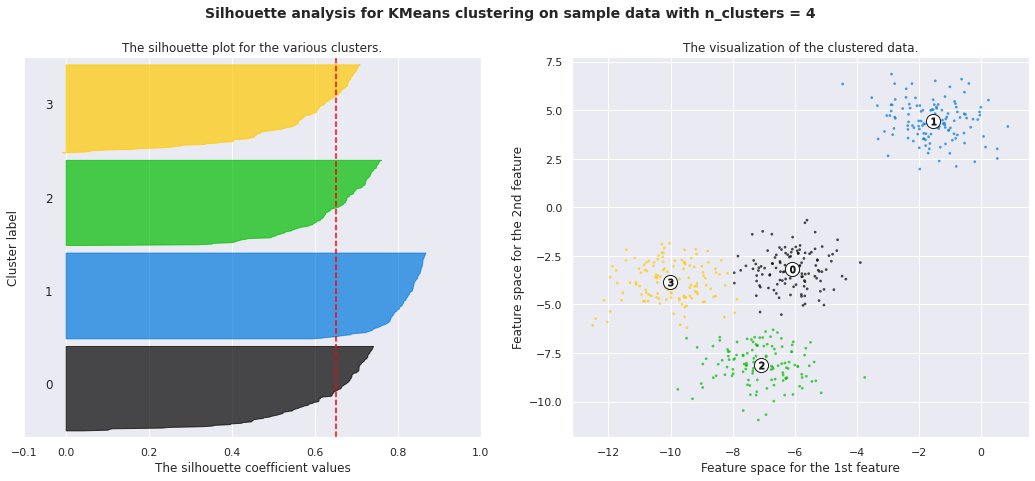

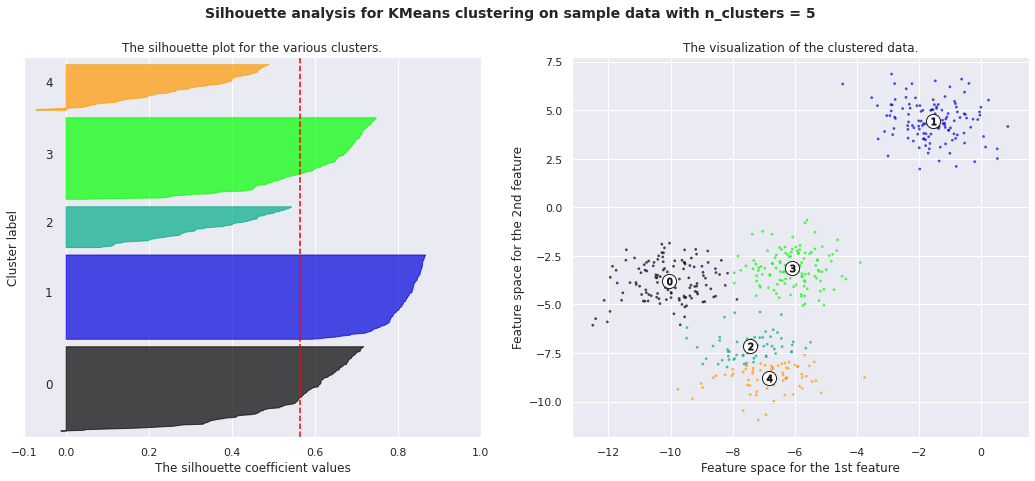

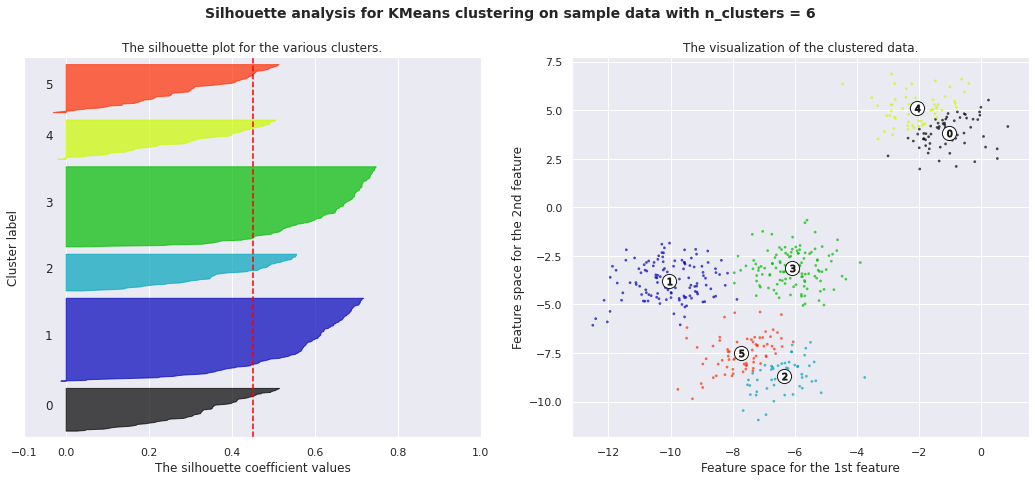

In [68]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)              #  For reproducibility

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

     # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of 4 and 5 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores.

Natural Language Processing (NLP) Model
For the NLP portion of this project, I will first convert all plot descriptions to word vectors so they can be processed by the NLP model. Then, the similarity between all word vectors will be calculated using cosine similarity (measures the angle between two vectors, resulting in a score between -1 and 1, corresponding to complete oppositses or perfectly similar vectors). Finally, I will extract the 5 movies or TV shows with the most similar plot description to a given movie or TV show.

In [61]:
!pip install matplotlib-venn
import spacy.cli
spacy.cli.download("en_core_web_lg")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [62]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')
nlp = spacy.blank('en')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [63]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [64]:
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
  return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [65]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean

In [66]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [67]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])